In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
!pip install beautifulsoup4
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
traindata = pd.read_csv('/content/train_F3WbcTw.csv')
traindata.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [3]:
testdata = pd.read_csv('/content/test_tOlRoBf.csv')
testdata.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [4]:
del traindata['unique_hash']
del testdata['unique_hash']


In [5]:
print(" TRAIN DATA ",traindata.head())
print(" TEST DATA ",testdata.head())

 TRAIN DATA                                                  text        drug  sentiment
0  Autoimmune diseases tend to come in clusters. ...     gilenya          2
1  I can completely understand why you’d want to ...     gilenya          2
2  Interesting that it only targets S1P-1/5 recep...  fingolimod          2
3  Very interesting, grand merci. Now I wonder wh...     ocrevus          2
4  Hi everybody, My latest MRI results for Brain ...     gilenya          1
 TEST DATA                                                  text        drug
0  256 (previously stable on natalizumab), with 5...  fingolimod
1  On fingolimod and have been since December 201...  fingolimod
2  Apparently it's shingles! :-/ I do have a few ...      humira
3  If the Docetaxel doing once a week x3 weeks th...    tagrisso
4  CC, Stelara worked in a matter of days for me....     stelara


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5279 non-null   object
 1   drug       5279 non-null   object
 2   sentiment  5279 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 123.9+ KB


In [7]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2924 non-null   object
 1   drug    2924 non-null   object
dtypes: object(2)
memory usage: 45.8+ KB


In [8]:
del traindata['sentiment']

In [9]:
traindata.head()

,text,drug
0,Autoimmune diseases tend to come in clusters. ...,gilenya
1,I can completely understand why you’d want to ...,gilenya
2,Interesting that it only targets S1P-1/5 recep...,fingolimod
3,"Very interesting, grand merci. Now I wonder wh...",ocrevus
4,"Hi everybody, My latest MRI results for Brain ...",gilenya


In [10]:
traindata.isnull().sum()

,0
text,0
drug,0


In [11]:
testdata.isnull().sum()

,0
text,0
drug,0


Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.496x0.77)


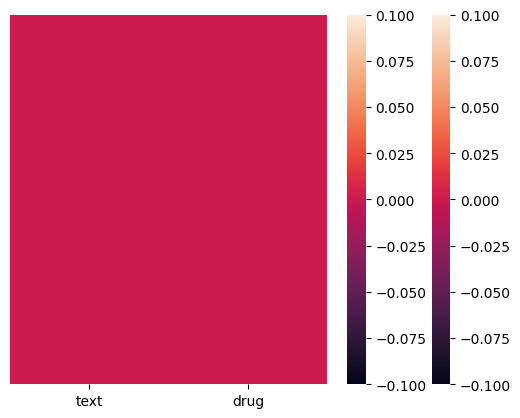

In [12]:
print(sns.heatmap(traindata.isnull(),yticklabels = False )) #heatmap
print(sns.heatmap(testdata.isnull(),yticklabels = False ))

In [13]:
traindata['drug'].value_counts()

,count
drug,
ocrevus,676
gilenya,666
ocrelizumab,441
entyvio,303
humira,270
...,...
infliximab-dyyb,1
pf-00547659,1
geftinib,1


In [14]:
traindata = traindata[(traindata['drug']=='ocrevus')|(traindata['drug']=='gilenya')|(traindata['drug']=='ocrelizumab')|(traindata['drug']=='entyvio')|(traindata['drug']=='humira')|(traindata['drug']=='fingolimod')|(traindata['drug']=='remicade')|(traindata['drug']=='opdivo')|(traindata['drug']=='tarceva')|(traindata['drug']=='cladribine')]

In [15]:
traindata['drug'].value_counts()

,count
drug,
ocrevus,676
gilenya,666
ocrelizumab,441
entyvio,303
humira,270
fingolimod,238
remicade,229
opdivo,224
tarceva,218


In [16]:
testdata = testdata[(testdata['drug']=='ocrevus')|(testdata['drug']=='gilenya')|(testdata['drug']=='ocrelizumab')|(testdata['drug']=='entyvio')|(testdata['drug']=='humira')|(testdata['drug']=='fingolimod')|(testdata['drug']=='remicade')|(testdata['drug']=='opdivo')|(testdata['drug']=='tarceva')|(testdata['drug']=='cladribine')]

In [17]:
testdata['drug'].value_counts()

,count
drug,
gilenya,311
ocrevus,302
humira,188
entyvio,183
remicade,174
ocrelizumab,161
opdivo,130
tarceva,126
fingolimod,105


<Axes: title={'center': ' train data Durgs'}, xlabel='drug', ylabel='Count'>

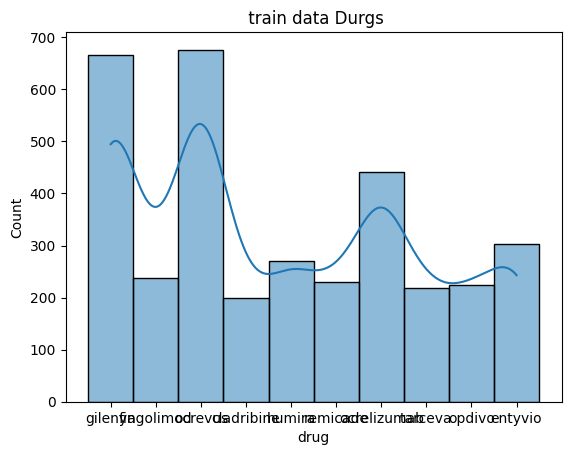

In [18]:
k=sns.histplot(traindata["drug"], kde=True)
k.set_title(" train data Durgs")
k

Text(0.5, 1.0, 'Word cloud for crevus')

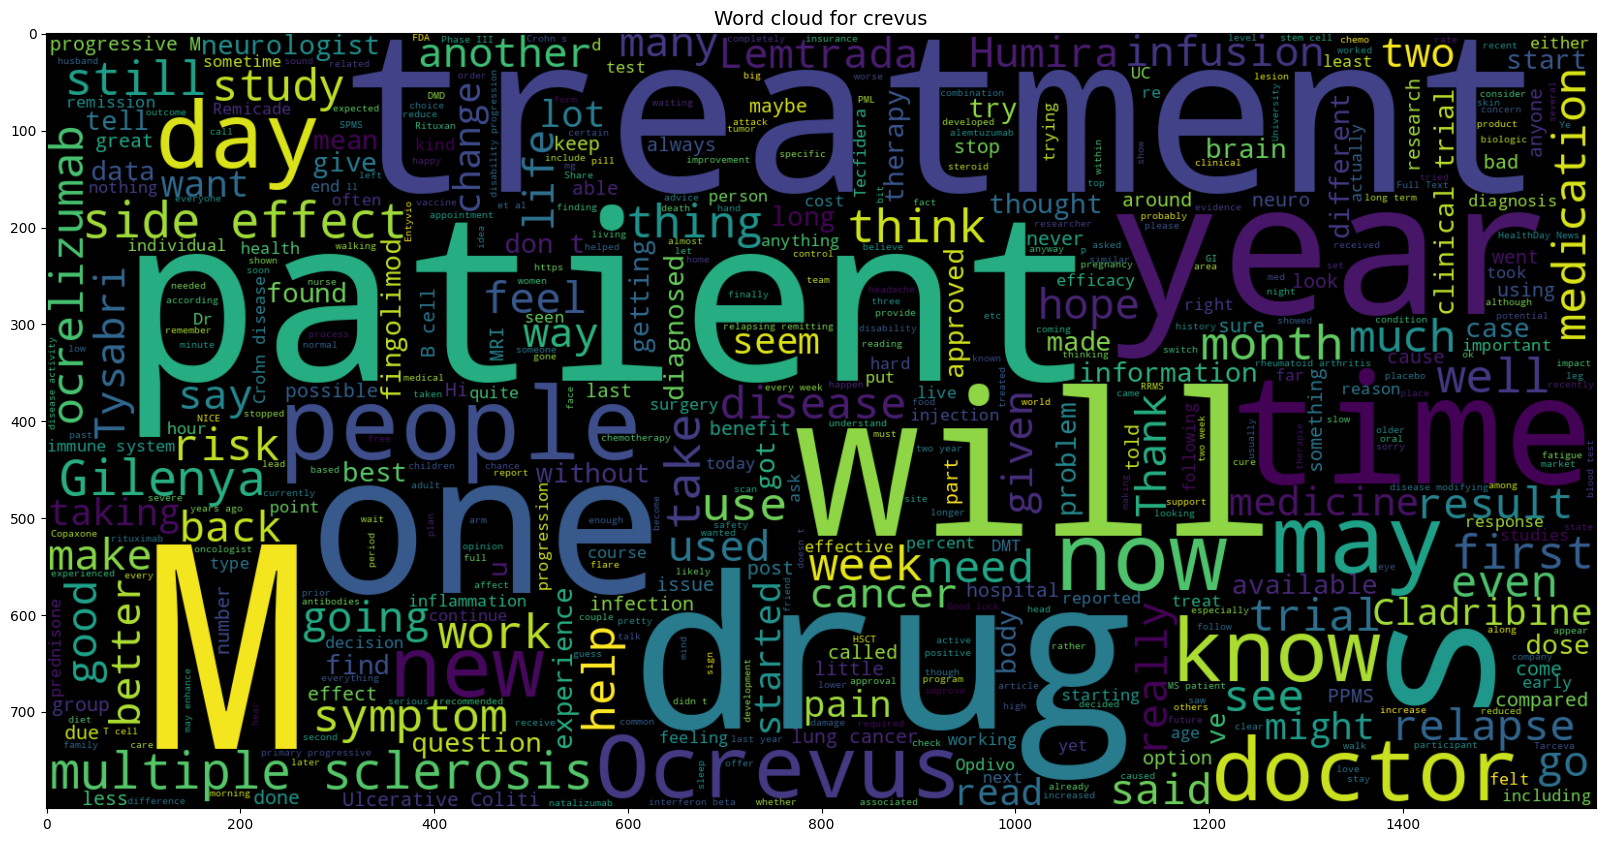

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(traindata.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for crevus',fontsize=14)

In [20]:
stop = stopwords.words('english')
print(stop)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [21]:

stop = stopwords.words('english')
def clean_data(raw_data):

    text = BeautifulSoup(raw_data, 'html.parser').get_text() # deletig html tags

    text = re.sub('[^a-zA-Z]', ' ', text) # make spaces b/w words

    text = text.lower().split() # spliting lower letters

    meaningful_text = [w for w in text if not w in stop]

    lemmatizer = WordNetLemmatizer()
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_text]

    return( ' '.join(lemmitize_words))

In [22]:
traindata['updated_text'] = traindata['text'].apply(clean_data)
traindata.head()

,text,drug,updated_text
0,Autoimmune diseases tend to come in clusters. ...,gilenya,autoimmune disease tend come cluster gilenya f...
1,I can completely understand why you’d want to ...,gilenya,completely understand want try result reported...
2,Interesting that it only targets S1P-1/5 recep...,fingolimod,interesting target p receptor rather like fing...
3,"Very interesting, grand merci. Now I wonder wh...",ocrevus,interesting grand merci wonder lemtrada ocrevu...
4,"Hi everybody, My latest MRI results for Brain ...",gilenya,hi everybody latest mri result brain cervical ...


In [23]:
del traindata['text']

In [24]:
traindata.head()

,drug,updated_text
0,gilenya,autoimmune disease tend come cluster gilenya f...
1,gilenya,completely understand want try result reported...
2,fingolimod,interesting target p receptor rather like fing...
3,ocrevus,interesting grand merci wonder lemtrada ocrevu...
4,gilenya,hi everybody latest mri result brain cervical ...


In [25]:
testdata['updated_text'] = testdata['text'].apply(clean_data)
del testdata['text']
testdata.head()

,drug,updated_text
0,fingolimod,previously stable natalizumab switching fingol...
1,fingolimod,fingolimod since december way describe better ...
2,humira,apparently shingle red spot left breast appear...
6,ocrevus,thought thing would better one year m talk hus...
8,gilenya,hi started gilenya week ago woeful anxiety tim...


label encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
traindata['drug']=le.fit_transform(traindata['drug'])
testdata['drug']=le.fit_transform(testdata['drug'])



In [27]:
x=le.transform(["fingolimod","ocrelizumab","remicade","entyvio","humira","ocrevus","gilenya","opdivo","tarceva","cladribine"])
x

array([2, 5, 8, 1, 4, 6, 3, 7, 9, 0])

In [30]:
dict1={2:"fingolimod",5:"ocrelizumab",8:"remicade",1:"entyvio",4:"humira",6:"ocrevus",3:"gilenya",7:"opdivo",9:"tarceva",0:"cladribine"}

Tokenizing

In [31]:
from transformers import BertTokenizer,BertForSequenceClassification,AdamW
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [32]:
updated_text = traindata['updated_text'].values

In [33]:
updated_text

array(['autoimmune disease tend come cluster gilenya feel good think change anything waste time energy taking tysabri feel amazing symptom dodgy color vision since always know know last month year decade ive decided enjoy ride point worrying',
       'completely understand want try result reported lecture always stand scrutiny peer review publication much still convincing hope work really aware happy risk great think important present balanced way understand move straight first show promise animal study using drug human still lot animal data gather human data gather anyone tell safe effective tell many time animal study follow human one major attrition point drug development unpredictability issue cladribine gilenya interaction predicted people try doctor see pattern work going clemastine metformin exciting given said current condition personal risk tolerance make sense try definitely everyone',
       'interesting target p receptor rather like fingolimod hoping soon see aes saes yes s

In [34]:
from torch.utils.data import TensorDataset

In [35]:
input_ids = []
attention_mask = []
for i in updated_text:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(traindata['drug'].values)
dataset_train = TensorDataset(input_ids, attention_mask, labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [36]:
input_ids = []
attention_mask = []
for i in testdata["updated_text"]:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(testdata['drug'].values)
dataset_test = TensorDataset(input_ids, attention_mask, labels)

Creating Tensor Datasets

In [37]:
from torch.utils.data import DataLoader,SequentialSampler,RandomSampler,random_split

In [38]:
train_dl = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=32)
test_dl = DataLoader(dataset_test, sampler=SequentialSampler(dataset_test), batch_size=32)


In [39]:
len(train_dl),len(test_dl)

(109, 56)

Imoprting BERT Model

In [48]:
model = BertForSequenceClassification.from_pretrained(
'bert-base-uncased',
num_labels = 10,
output_attentions = False,
output_hidden_states = False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [50]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [52]:
optimizer = AdamW(model.parameters(),lr = 2e-5,eps=1e-8)

Configuring Optimizer and Scheduler

In [53]:
from transformers import get_linear_schedule_with_warmup
epochs = 5

total_steps = len(train_dl)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,
                                           num_training_steps=total_steps)

In [54]:
def accuracy(preds,labels):
    pred_flat = np.argmax(preds,axis=1).flatten()
    label_flat = labels.flatten()
    return np.sum(pred_flat==label_flat)/len(label_flat)

In [55]:
def evaluate(dataloader_test):
    model.eval()
    loss_val_total = 0
    predictions,true_vals = [],[]
    for batch in dataloader_test:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids':batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total / len(dataloader_test)
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals

model training

In [56]:
from tqdm.notebook import tqdm
torch.cuda.empty_cache()
for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(train_dl, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.type(torch.long).to(device) for b in batch)


        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(train_dl)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(test_dl)
    val_acc = accuracy(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Accuracy: {val_acc}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/109 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.7705196984317324
Validation loss: 1.2155204660126142
Accuracy: 0.6966292134831461


Epoch 2:   0%|          | 0/109 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.8919841988917885
Validation loss: 0.7726845773203033
Accuracy: 0.753370786516854


Epoch 3:   0%|          | 0/109 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.5954246843626739
Validation loss: 0.6914497720343726
Accuracy: 0.7646067415730337


Epoch 4:   0%|          | 0/109 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.46897615642722595
Validation loss: 0.683710518692221
Accuracy: 0.7606741573033707


Epoch 5:   0%|          | 0/109 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.4157706564719524
Validation loss: 0.6854878419211933
Accuracy: 0.7606741573033707


In [57]:
output_dir = './'
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [58]:
from transformers import BertTokenizer,BertForSequenceClassification
import torch


output_dir = './'
tokenizer = BertTokenizer.from_pretrained(output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)

In [59]:
def Sentiment(sent):
    output_dir = './'
    tokenizer = BertTokenizer.from_pretrained(output_dir)
    model_loaded = BertForSequenceClassification.from_pretrained(output_dir)
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_id = encoded_dict['input_ids']

    attention_mask = encoded_dict['attention_mask']
    input_id = torch.LongTensor(input_id)
    attention_mask = torch.LongTensor(attention_mask)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_loaded = model_loaded.to(device)
    input_id = input_id.to(device)
    attention_mask = attention_mask.to(device)

    with torch.no_grad():
        outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs[0]
    index = logits.argmax()
    return index

In [60]:
a = Sentiment('i have cold')
a = a.item()
print(dict1[a])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


opdivo


In [61]:
k = Sentiment("i have fever")
k = k.item()
print(dict1[k])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


opdivo


In [62]:
k = Sentiment("OCREVUS is a prescription medicine used to treat: Relapsing forms of multiple sclerosis (MS)")
k = k.item()
print(dict1[k])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


ocrevus


In [63]:
c = Sentiment("to treat the relapsing forms of multiple sclerosis (MS)")
c = c.item()
print(dict1[c])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


fingolimod
